<a href="https://colab.research.google.com/github/kagdelwarsejal/YouTube-adview-prediction/blob/main/youtube_adview_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Remove the extra backslash at the end of the path
path = "/content/drive/MyDrive/ml internship projects/"
data_train = pd.read_csv(path+"train.csv")
data_train.head()
data_train.shape

(14999, 9)

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


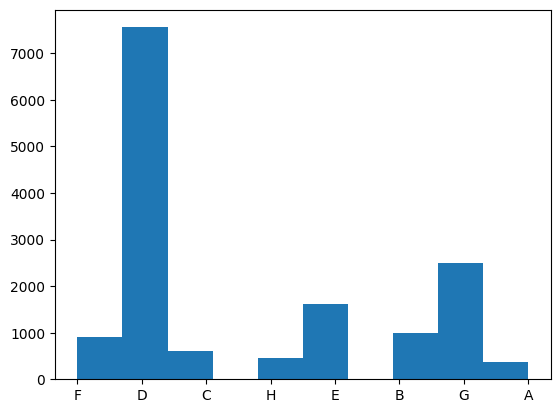

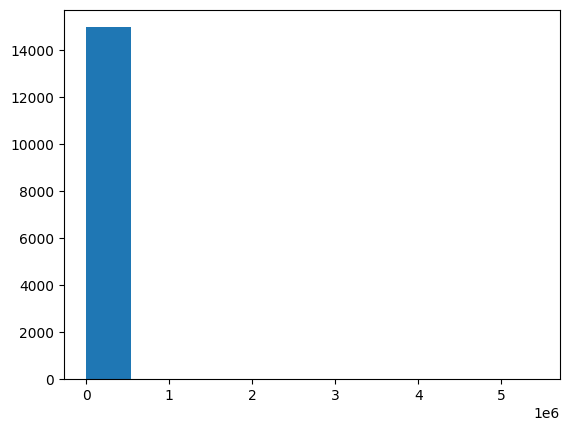

In [4]:
#visulization
#individual plots
plt.hist(data_train["category"])
plt.show()
plt.hist(data_train["adview"])
plt.show()


#remove video with adview greater than 2000000 as outlinew
data_train = data_train[data_train["adview"]<2000000]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

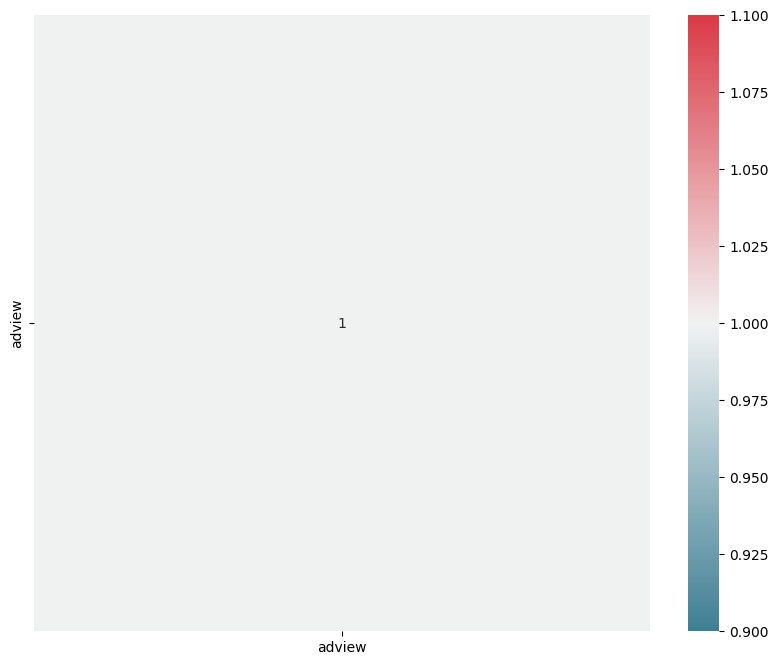

In [6]:
#heatmap
f, ax = plt.subplots(figsize=(10,8))

# Select only numeric columns for correlation calculation
numeric_data = data_train.select_dtypes(include=[np.number])
corr = numeric_data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr), cmap=sns.diverging_palette(220,10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [7]:
#assigning each category a number for category feature
category={'A':1,'B':2,'C':3, 'D':4, 'E':5,'F':6,'G':7,'H':8}
data_train['category']=data_train['category'].map(category)
data_train.head()

#removing character "F" present in data
data_train = data_train[data_train.views != 'F']
data_train = data_train[data_train.likes != 'F']
data_train = data_train[data_train.dislikes != 'F']
data_train = data_train[data_train.comment != 'F']

In [8]:

#convert values to integer for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"] = pd.to_numeric(data_train["adview"])

column_vidid = data_train['vidid']

from sklearn.preprocessing import LabelEncoder
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])
data_train.head()

import datetime
import time

In [13]:
import datetime
import time
import pandas as pd

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else :
      if(i=="H"):
        h=mm
        mm=''
      elif(i=="M"):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if(h==''):
    h='00'
  if(m==''):
    m='00'
  if(s==''):
    s='00'
  bp=h+':'+m+':'+s
  return bp

def func_sec(time12):
  h,m,s = time12.split(':')
  return int(h)*3600+int(m)*60+int(s)

# Load the data and apply the checki function

train = pd.read_csv("/content/drive/MyDrive/ml internship projects/train.csv") # Assuming 'train.csv' is in the current directory
time12 = train["duration"].apply(checki)  # Create time12 outside the function

# Apply func_sec to the time12 Series
time1 = time12.apply(func_sec)

# Assign the result to the 'duration' column of data_train
data_train["duration"] = time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [15]:
#split data
Y_train =pd.DataFrame(data = data_train.iloc[:,1].values, columns = ['target'])
data_train = data_train.drop(["adview"],axis=1)
data_train = data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

(11708, 7)

In [16]:
#noemalise data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [17]:
#evaluation matrics
from sklearn import metrics
def print_error(X_test,Y_test,model_name):
  prediction = model_name.predict(X_test)
  print("Mean absolute error : ",metrics.mean_absolute_error(prediction,Y_test))
  print("Mean squared error : ",metrics.mean_squared_error(prediction,Y_test))
  print("Root mean squared error : ",np.sqrt(metrics.mean_squared_error(prediction,Y_test)))

In [18]:
#linear regretion
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,Y_train)
print_error(X_test,Y_test,linear_regression)

Mean absolute error :  3707.3780058245316
Mean squared error :  835663131.1210335
Root mean squared error :  28907.83857573986


In [19]:
#support vector regretion
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,Y_train)
print_error(X_test,Y_test,supportvector_regressor)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error :  1696.9438599505638
Mean squared error :  833685776.029172
Root mean squared error :  28873.617300732723


In [20]:
#decisison tree regretion
from sklearn.tree import DecisionTreeRegressor
decisiontree_regressor = DecisionTreeRegressor()
decisiontree_regressor.fit(X_train,Y_train)
print_error(X_test,Y_test,decisiontree_regressor)

Mean absolute error :  2714.122950819672
Mean squared error :  900963991.9856558
Root mean squared error :  30016.062233172022


In [21]:
#random forest regretion
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
randomforest_regressor = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf)
randomforest_regressor.fit(X_train,Y_train)
print_error(X_test,Y_test,randomforest_regressor)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean absolute error :  3334.9517014289804
Mean squared error :  712874221.4586525
Root mean squared error :  26699.704520062623


In [24]:
#artificial nural network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
    keras.layers.Dense(6,activation="relu", input_shape=(X_train.shape[1:])),
    keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(1)
])


optimizer = keras.optimizers.Adam()
loss = keras.losses.MeanSquaredError()
ann.compile(optimizer=optimizer,loss = loss, metrics=["mean_absolute_error"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
history = ann.fit(X_train,Y_train,epochs=100)
ann.summary()
print_error(X_test,Y_test,ann)

Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 614699264.0000 - mean_absolute_error: 1637.1932
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 516133408.0000 - mean_absolute_error: 1335.6427
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 805760576.0000 - mean_absolute_error: 1926.9174
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 442280704.0000 - mean_absolute_error: 1510.4136
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 926737152.0000 - mean_absolute_error: 1952.9175
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1038909056.0000 - mean_absolute_error: 1826.2776
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1524240640.0000 - mean_absolute_error: 2213.0815
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 889533504.0000 - mean_absolute_error: 1842.3779
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 963286720.0000 - mean_absolute_error: 1916.7080
Epoch 10/100
366/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean absolute error :  3308.776711221601
Mean squared error :  829729441.5444256
Root mean squared error :  28805.024588505832


In [27]:
#saving scikitlearn models
import joblib
joblib.dump(decisiontree_regressor,"decisiontree_youtubeviews.pkl") # Use the correct variable name

#saving keras artificial nural network model
ann.save("ann_youtubeviews.h5")